In [88]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/STAR.csv")
df.set_index("Unnamed: 0", inplace=True)

## 分析の方針

リサーチクエスチョン: どんな変数が教育効果に影響を与えていそうか？（因果推論的な手法は使わず、あくまでもグラフで示すこと）

1. とりあえず範囲を絞って考える：幼稚園, 小学校1年, 小学校2年, 小学校3年で分けて考える

2. クラスのみが、意図的にランダムに割り付けられていることを示す

3. クラスごとで、各カテゴリの分布には大きな差がないことを示す

4. クラスごとのテストの平均値、分散などを出して比較する: グラフ、F検定など？

In [89]:
df["birth"].unique()
# df["birth"].unique()で取得したuniqueな値について、各文字列の空白を削除した後、"Q1"を.0、"Q2"を.25、"Q3"を.5、"Q4"を.75に変換する。その後、文字列から数値へ変換する
df["birth"] = df["birth"].str.replace(" Q1", ".0").str.replace(" Q2", ".25").str.replace(" Q3", ".5").str.replace(" Q4", ".75").astype(float)
# genderの列の値がfemaleだった場合は0に、maleだった場合は1に変換する
df["gender"] = df['gender'].map({'female': 0, 'male': 1})
# lunchの各列に対して、freeの場合は1に、non-freeの場合は0に変換する
df["lunchk"] = df["lunchk"].map({'non-free': 0, 'free': 1})
df["lunch1"] = df["lunch1"].map({'non-free': 0, 'free': 1})
df["lunch2"] = df["lunch2"].map({'non-free': 0, 'free': 1})
df["lunch3"] = df["lunch3"].map({'non-free': 0, 'free': 1})

In [90]:
# 普遍的なデータが入っているデータフレームを作る
df_basic = df[["gender", "ethnicity", "birth"]]
# 列名の最後がkの列を抽出
df_k = df[[col for col in df.columns if col.endswith("k")]]
# 列名の最後が1の列を抽出
df_1 = df[[col for col in df.columns if col.endswith("1")]]
# 列名の最後が2の列を抽出
df_2 = df[[col for col in df.columns if col.endswith("2")]]
# 列名の最後が3の列を抽出
df_3 = df[[col for col in df.columns if col.endswith("3")]]

# df_basicと、それぞれのデータフレームを結合
df_k = pd.concat([df_basic, df_k], axis=1)
df_1 = pd.concat([df_basic, df_1], axis=1)
df_2 = pd.concat([df_basic, df_2], axis=1)
df_3 = pd.concat([df_basic, df_3], axis=1)
df_3

,gender,ethnicity,birth,star3,read3,math3,lunch3,school3,degree3,ladder3,experience3,tethnicity3,system3,schoolid3
Unnamed: 0,,,,,,,,,,,,,,
1122,0.0,afam,1979.50,regular,580.0,564.0,1.0,suburban,bachelor,level1,30.0,cauc,22.0,54.0
1137,0.0,cauc,1980.00,small,587.0,593.0,1.0,rural,bachelor,apprentice,1.0,cauc,30.0,63.0
1143,0.0,afam,1979.75,regular+aide,644.0,639.0,0.0,suburban,bachelor,level1,4.0,cauc,11.0,20.0
1160,1.0,cauc,1979.75,small,686.0,667.0,0.0,rural,bachelor,level1,10.0,cauc,6.0,8.0
1183,1.0,afam,1980.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186650,1.0,cauc,1979.50,small,675.0,678.0,0.0,rural,master,level1,17.0,cauc,21.0,49.0
186665,0.0,cauc,1980.50,regular,654.0,651.0,1.0,rural,bachelor,notladder,7.0,cauc,33.0,67.0
186687,1.0,cauc,1980.00,regular,595.0,672.0,0.0,suburban,bachelor,level1,22.0,cauc,25.0,58.0


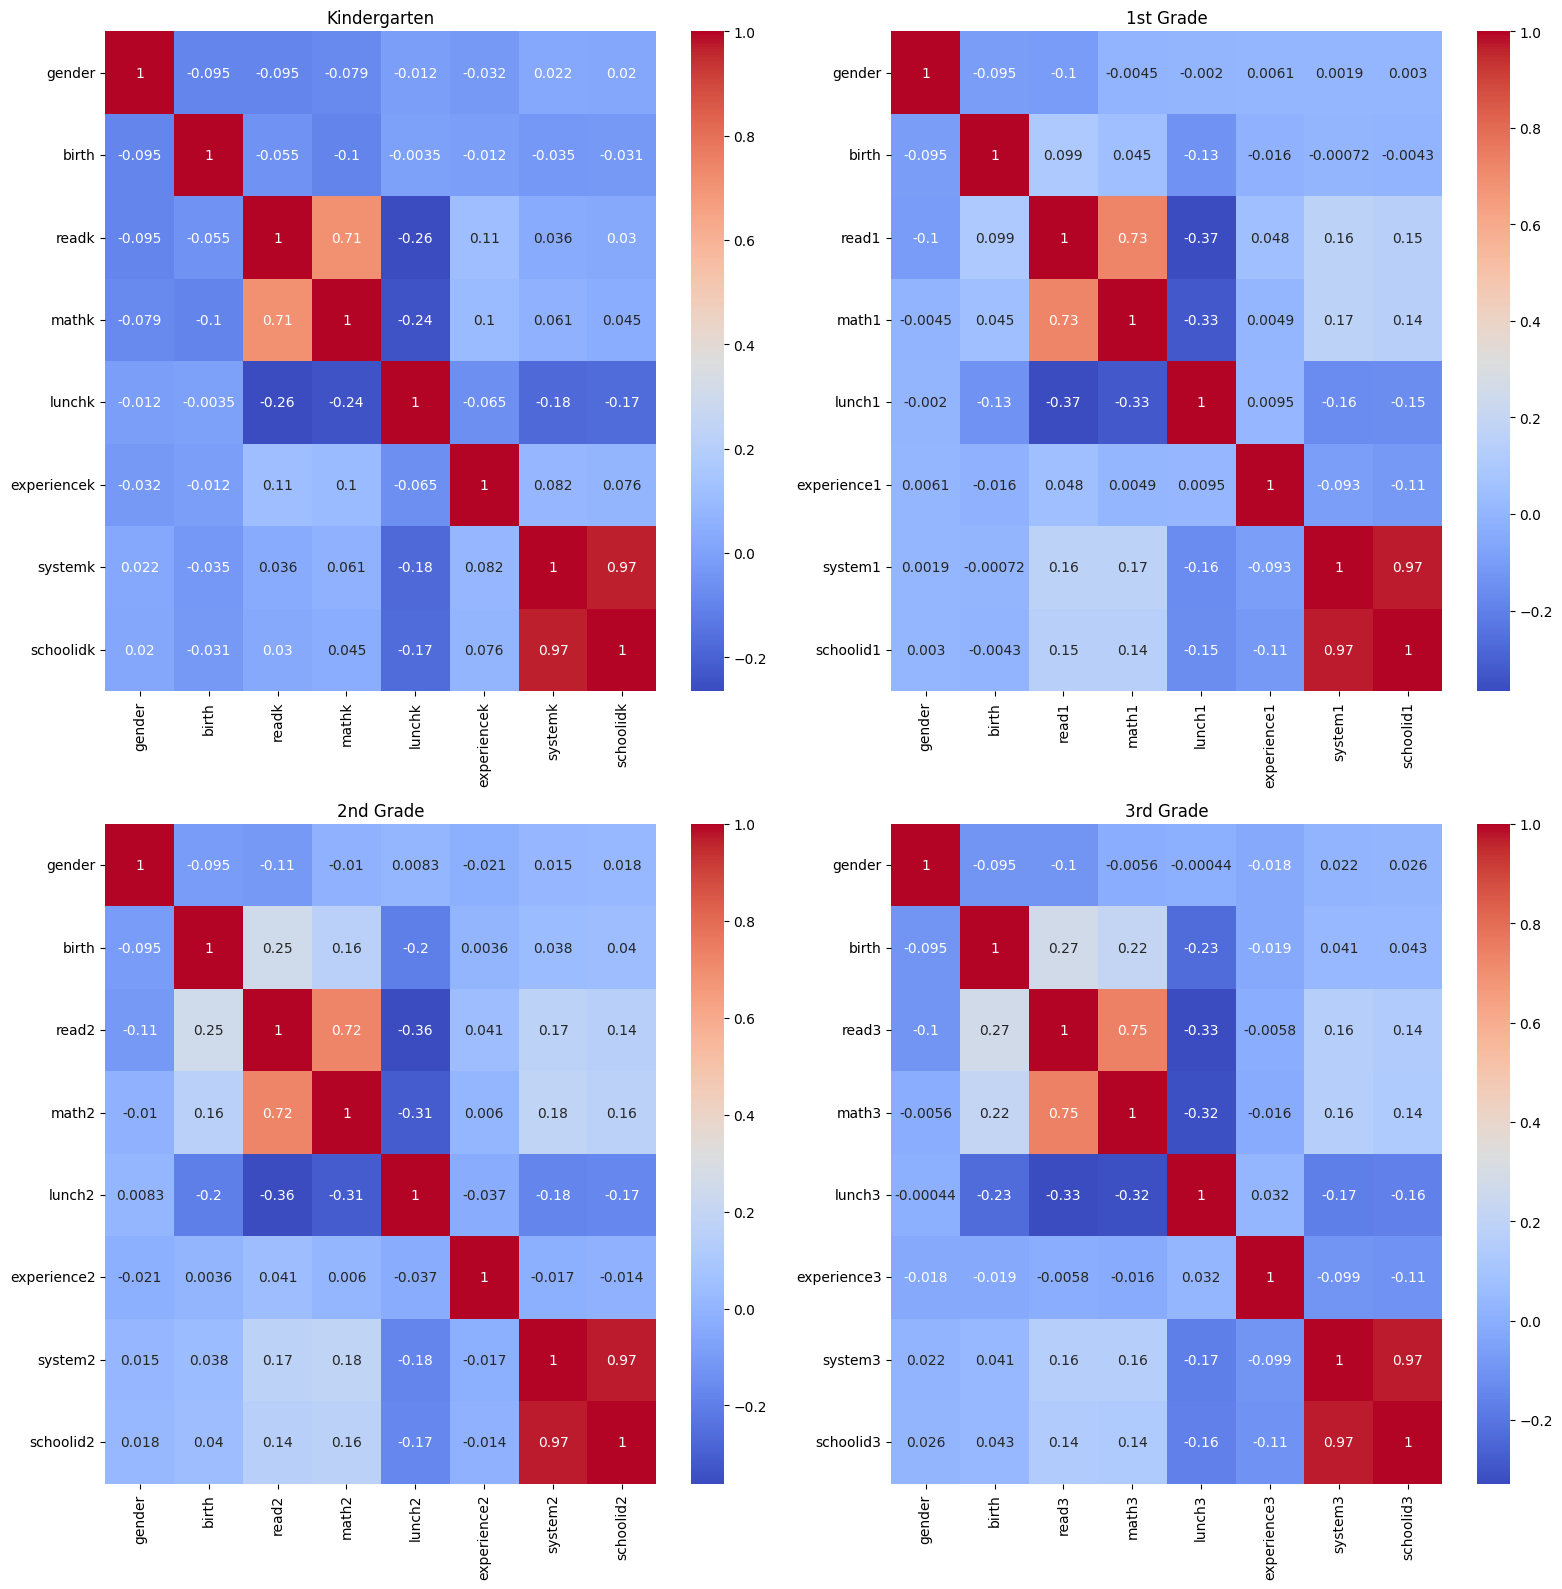

In [97]:
# 各データフレームのヒートマップを作成
import seaborn as sns
import matplotlib.pyplot as plt

# 各データフレームの列で、文字列のものを除いてヒートマップを作成する
# 色をわかりやすいものに変更する
# 4つのヒートマップを、すべて同じ画像にまとめて表示する
plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
plt.title("Kindergarten")
sns.heatmap(df_k.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")

plt.subplot(2, 2, 2)
plt.title("1st Grade")
sns.heatmap(df_1.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")

plt.subplot(2, 2, 3)
plt.title("2nd Grade")
sns.heatmap(df_2.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")

plt.subplot(2, 2, 4)
plt.title("3rd Grade")
sns.heatmap(df_3.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")

plt.tight_layout()
plt.show()

In [101]:
# それぞれのデータフレームの、lunch, genderの列をもとに戻す
df_k["gender"] = df_k['gender'].map({0: 'female', 1: 'male'})
df_1["gender"] = df_1['gender'].map({0: 'female', 1: 'male'})
df_2["gender"] = df_2['gender'].map({0: 'female', 1: 'male'})
df_3["gender"] = df_3['gender'].map({0: 'female', 1: 'male'})

df_k["lunchk"] = df_k["lunchk"].map({0: 'non-free', 1: 'free'})
df_1["lunch1"] = df_1["lunch1"].map({0: 'non-free', 1: 'free'})
df_2["lunch2"] = df_2["lunch2"].map({0: 'non-free', 1: 'free'})
df_3["lunch3"] = df_3["lunch3"].map({0: 'non-free', 1: 'free'})

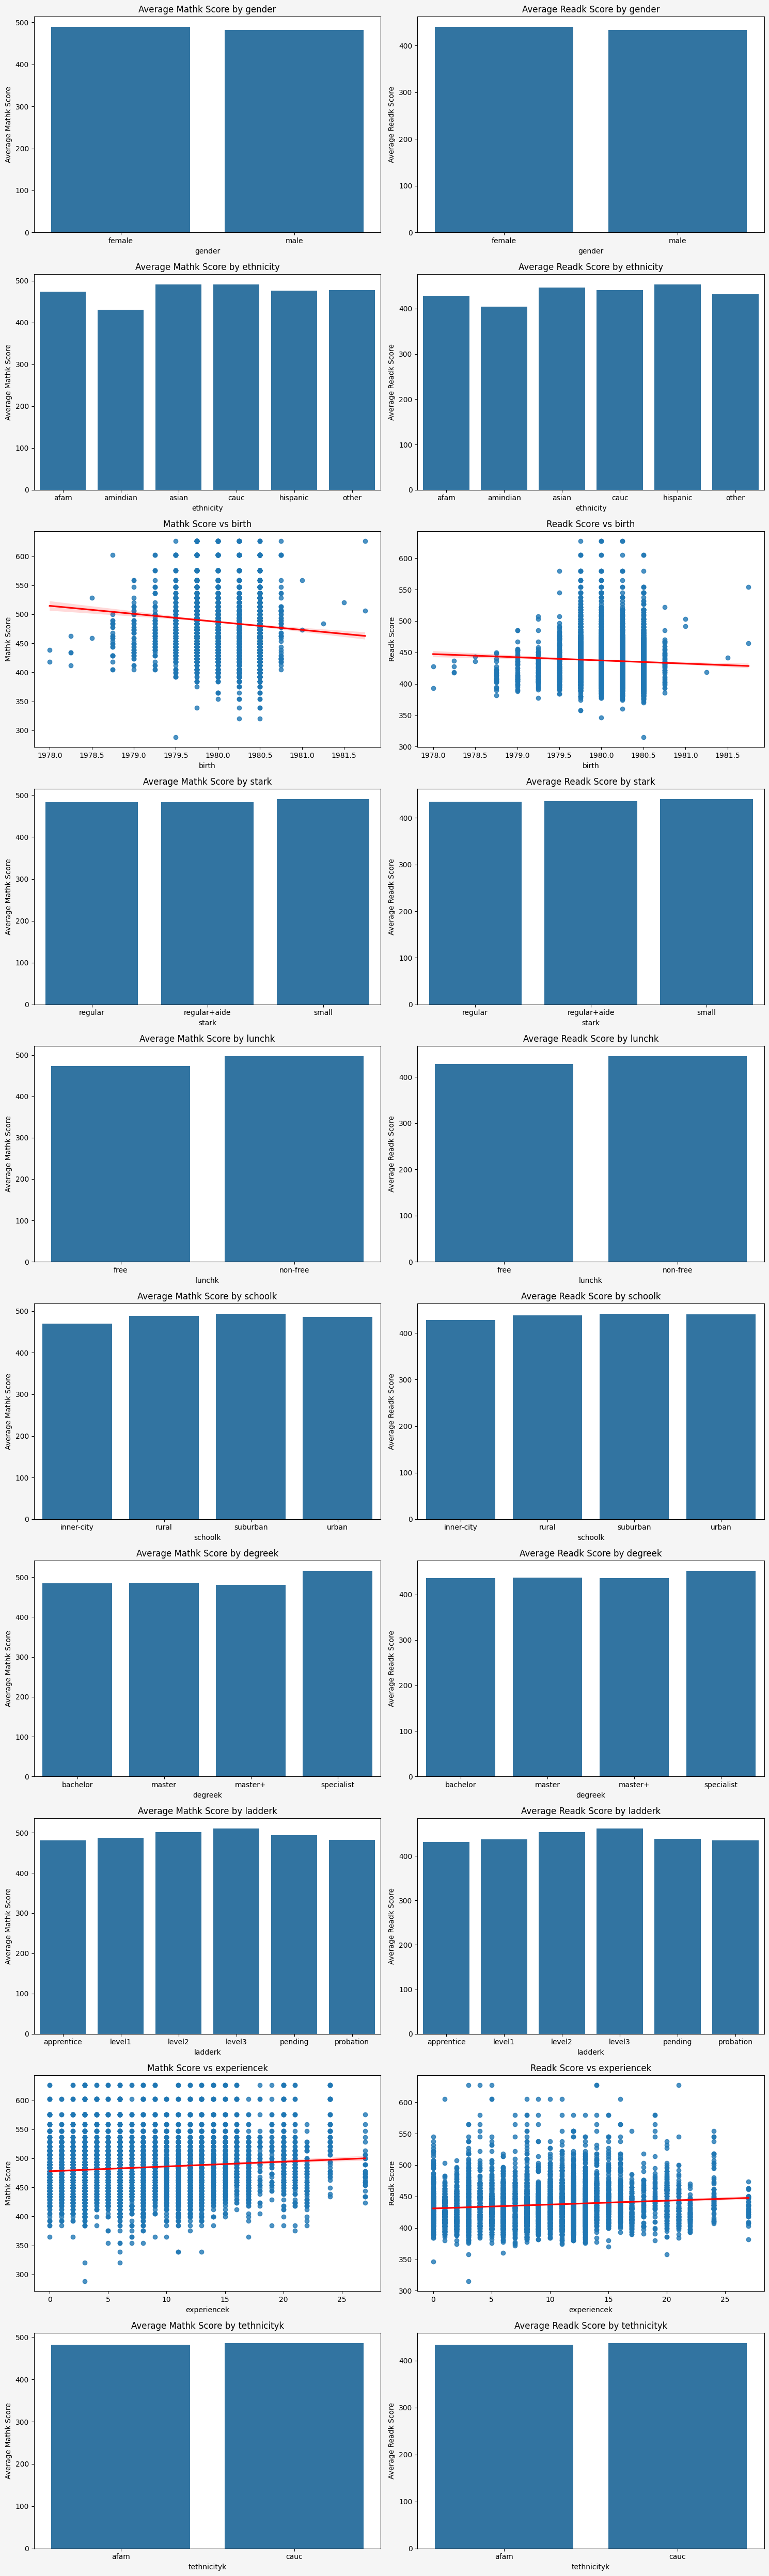

In [105]:
# グラフを描画するための設定
num_columns = len(df_k.columns) - 4
fig, axes = plt.subplots(num_columns, 2, figsize=(15, 5 * num_columns), facecolor="whitesmoke")

# 各カテゴリカル変数に対してmathkとreadkの平均値を計算し、可視化
i = 0
for column in df_k.columns:
    if column in ["mathk", "readk"]:
        continue

    mean_values = df_k.groupby(column)[['mathk', 'readk']].mean().reset_index()

    if column in ["gender", "ethnicity", "stark", "schoolk", "lunchk", "degreek", "ladderk", "tethnicityk"]:
        # mathkの平均値を棒グラフで表示
        sns.barplot(x=column, y='mathk', data=mean_values, ax=axes[i, 0])
        axes[i, 0].set_title(f'Average Mathk Score by {column}')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Average Mathk Score')
        
        # readkの平均値を棒グラフで表示
        sns.barplot(x=column, y='readk', data=mean_values, ax=axes[i, 1])
        axes[i, 1].set_title(f'Average Readk Score by {column}')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Average Readk Score')
        i += 1
    
    if column in ["birth", "experiencek"]:
        # mathkの平均値を散布図で表示
        # 近似曲線の色を変更
        sns.regplot(x=column, y='mathk', data=df_k, ax=axes[i, 0], line_kws={"color": "red"})
        axes[i, 0].set_title(f'Mathk Score vs {column}')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Mathk Score')
        
        # readkの平均値を散布図で表示
        # 近似曲線の色を変更
        sns.regplot(x=column, y='readk', data=df_k, ax=axes[i, 1], line_kws={"color": "red"})
        axes[i, 1].set_title(f'Readk Score vs {column}')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Readk Score')
        i += 1

plt.tight_layout()
plt.show()

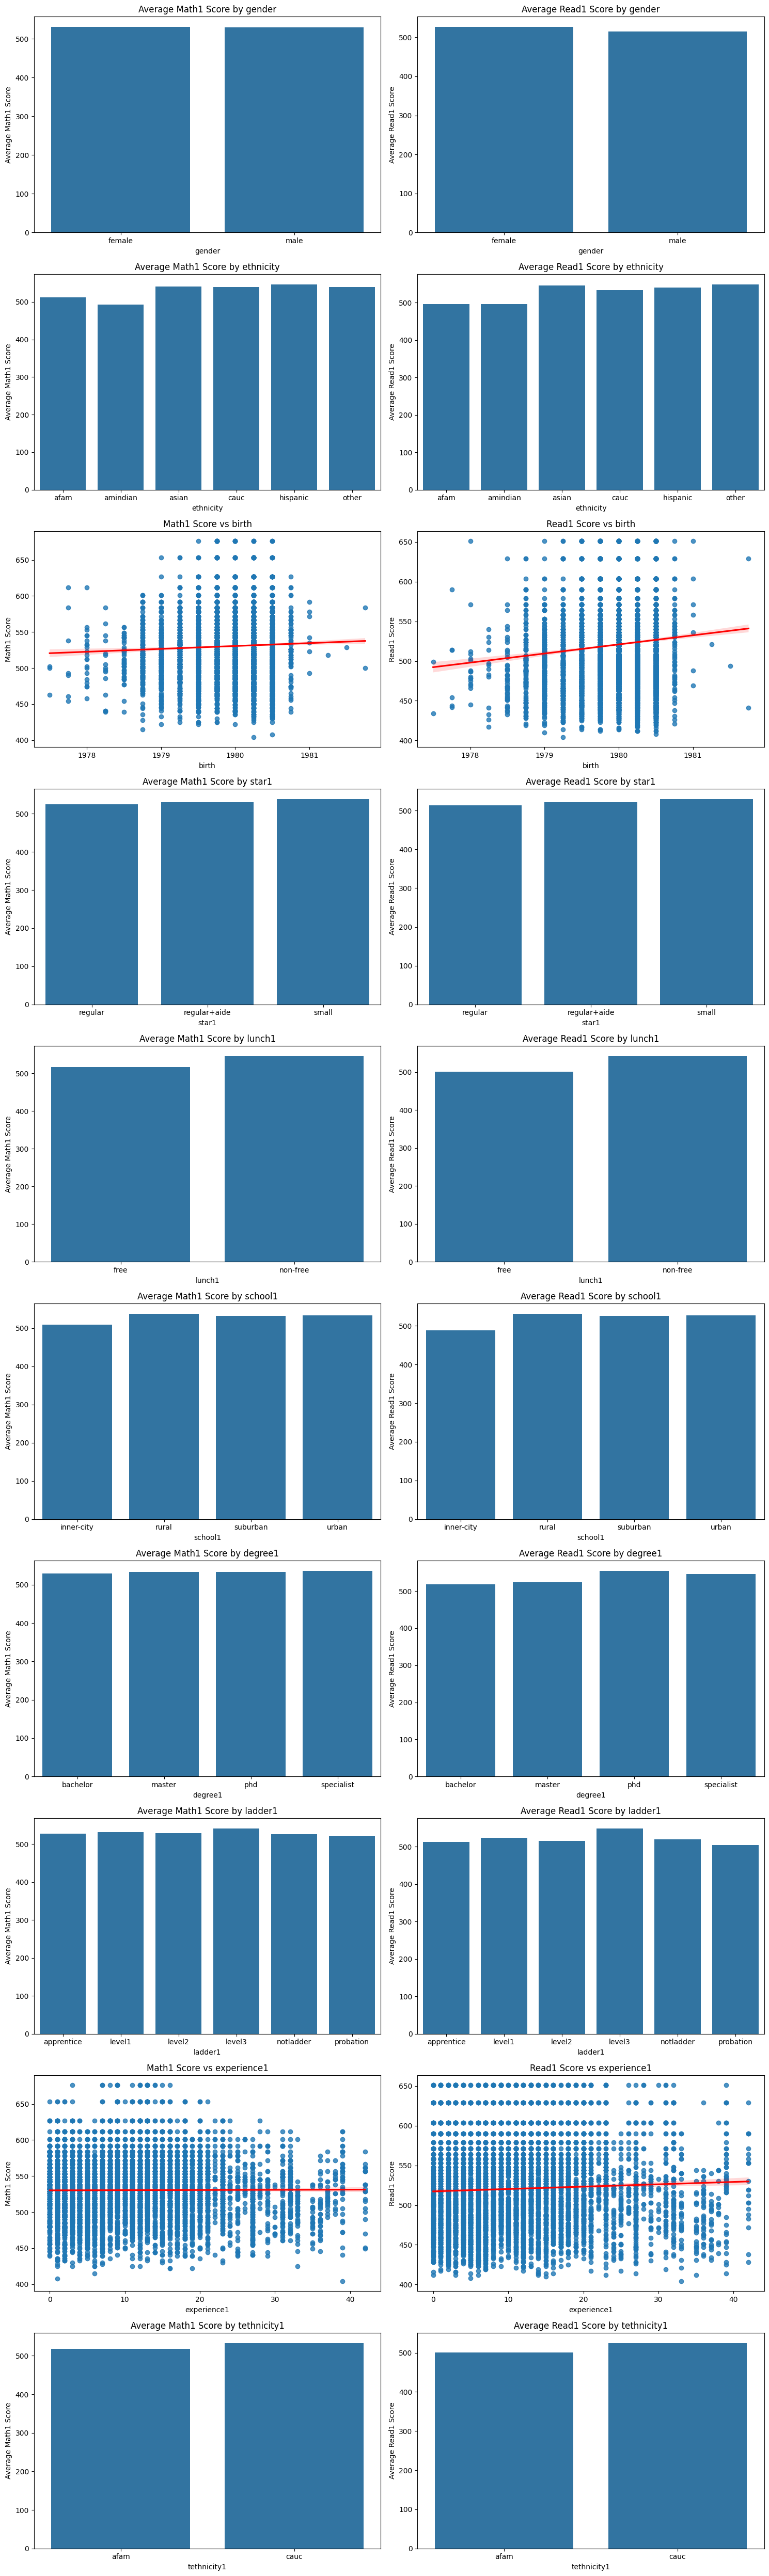

In [106]:
# グラフを描画するための設定
num_columns = len(df_1.columns) - 4
fig, axes = plt.subplots(num_columns, 2, figsize=(15, 5 * num_columns))

# 各カテゴリカル変数に対してmathkとreadkの平均値を計算し、可視化
i = 0
for column in df_1.columns:
    if column in ["math1", "read1"]:
        continue

    mean_values = df_1.groupby(column)[['math1', 'read1']].mean().reset_index()

    if column in ["gender", "ethnicity", "star1", "school1", "lunch1", "degree1", "ladder1", "tethnicity1"]:
        # mathkの平均値を棒グラフで表示
        sns.barplot(x=column, y='math1', data=mean_values, ax=axes[i, 0])
        axes[i, 0].set_title(f'Average Math1 Score by {column}')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Average Math1 Score')
        
        # readkの平均値を棒グラフで表示
        sns.barplot(x=column, y='read1', data=mean_values, ax=axes[i, 1])
        axes[i, 1].set_title(f'Average Read1 Score by {column}')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Average Read1 Score')
        i += 1
    
    if column in ["birth", "experience1"]:
        # mathkの平均値を散布図で表示
        # 近似曲線の色を変更
        sns.regplot(x=column, y='math1', data=df_1, ax=axes[i, 0], line_kws={"color": "red"})
        axes[i, 0].set_title(f'Math1 Score vs {column}')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Math1 Score')
        
        # readkの平均値を散布図で表示
        # 近似曲線の色を変更
        sns.regplot(x=column, y='read1', data=df_1, ax=axes[i, 1], line_kws={"color": "red"})
        axes[i, 1].set_title(f'Read1 Score vs {column}')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Read1 Score')
        i += 1

plt.tight_layout()
plt.show()

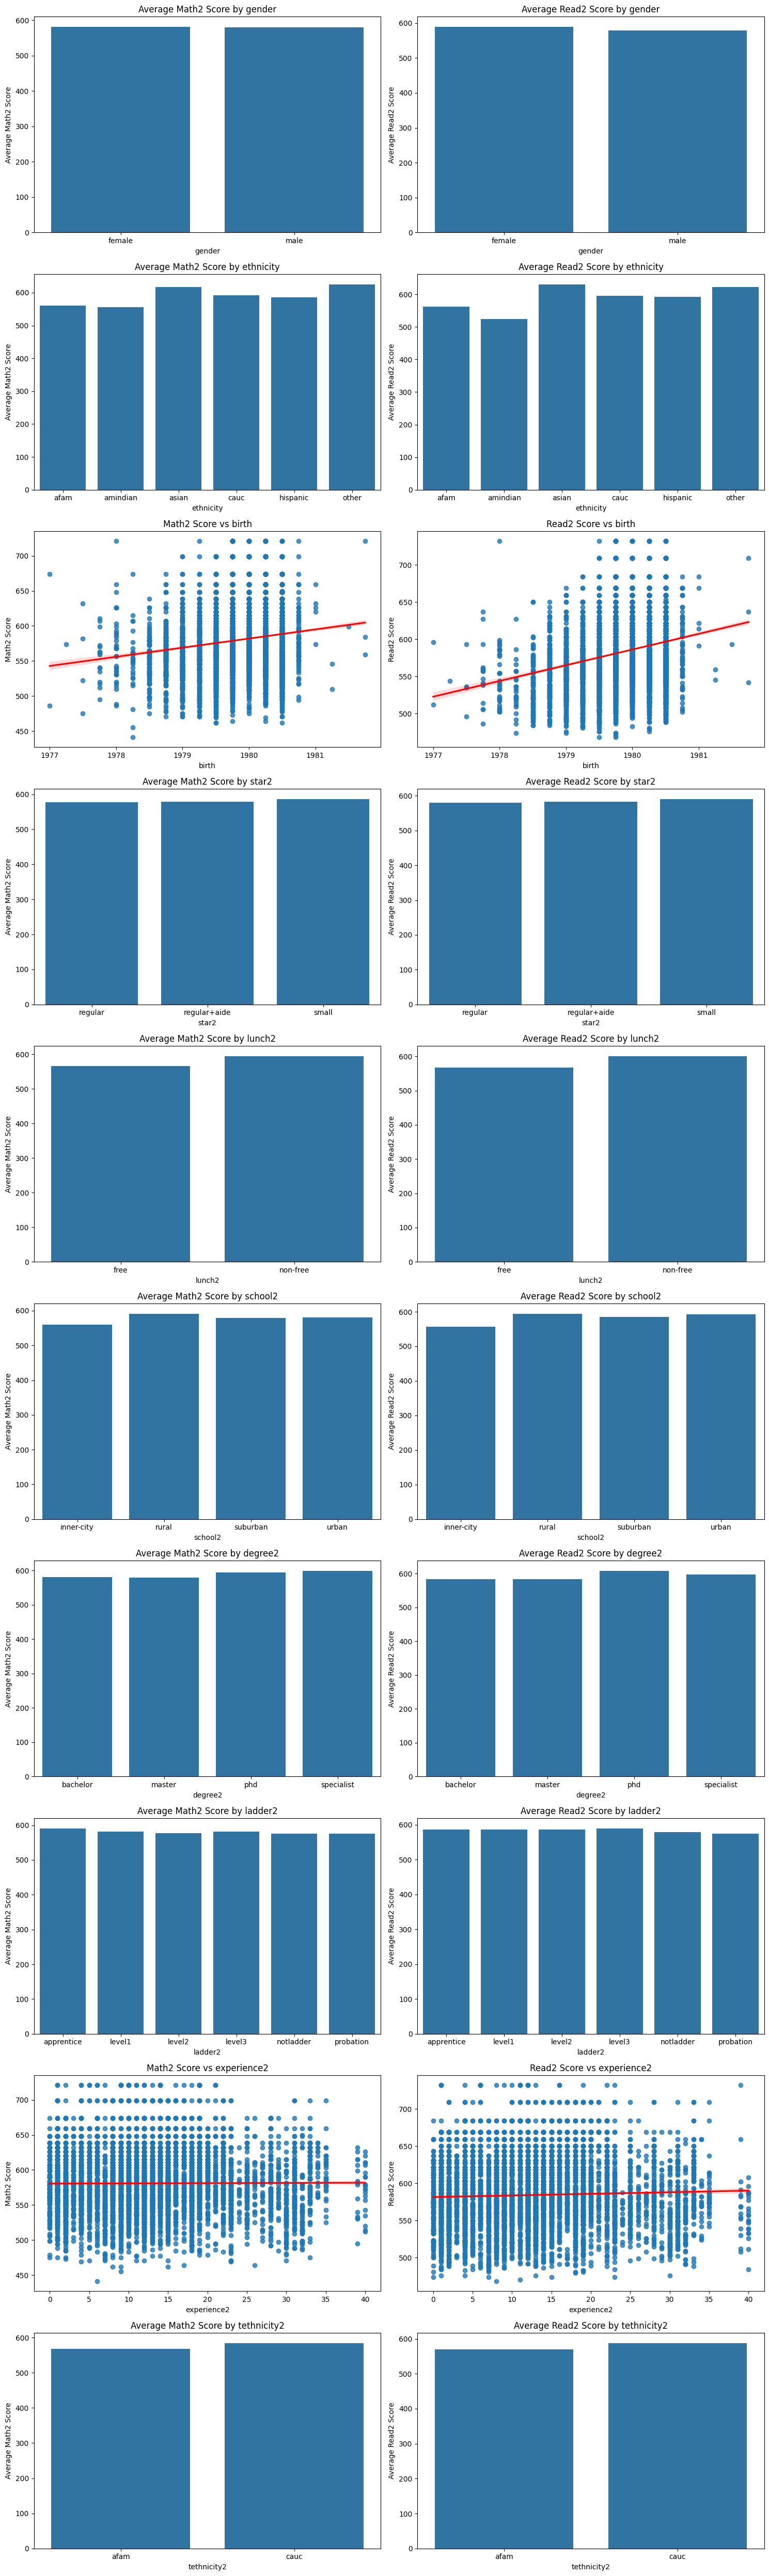

In [107]:
# グラフを描画するための設定
num_columns = len(df_2.columns) - 4
fig, axes = plt.subplots(num_columns, 2, figsize=(15, 5 * num_columns))

# 各カテゴリカル変数に対してmathkとreadkの平均値を計算し、可視化
i = 0
for column in df_2.columns:
    if column in ["math2", "read2"]:
        continue

    mean_values = df_2.groupby(column)[['math2', 'read2']].mean().reset_index()

    if column in ["gender", "ethnicity", "star2", "school2", "lunch2", "degree2", "ladder2", "tethnicity2"]:
        # mathkの平均値を棒グラフで表示
        sns.barplot(x=column, y='math2', data=mean_values, ax=axes[i, 0])
        axes[i, 0].set_title(f'Average Math2 Score by {column}')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Average Math2 Score')
        
        # readkの平均値を棒グラフで表示
        sns.barplot(x=column, y='read2', data=mean_values, ax=axes[i, 1])
        axes[i, 1].set_title(f'Average Read2 Score by {column}')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Average Read2 Score')
        i += 1
    
    if column in ["birth", "experience2"]:
        # mathkの平均値を散布図で表示
        # 近似曲線の色を変更
        sns.regplot(x=column, y='math2', data=df_2, ax=axes[i, 0], line_kws={"color": "red"})
        axes[i, 0].set_title(f'Math2 Score vs {column}')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Math2 Score')
        
        # readkの平均値を散布図で表示
        # 近似曲線の色を変更
        sns.regplot(x=column, y='read2', data=df_2, ax=axes[i, 1], line_kws={"color": "red"})
        axes[i, 1].set_title(f'Read2 Score vs {column}')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Read2 Score')
        i += 1

plt.tight_layout()
plt.show()

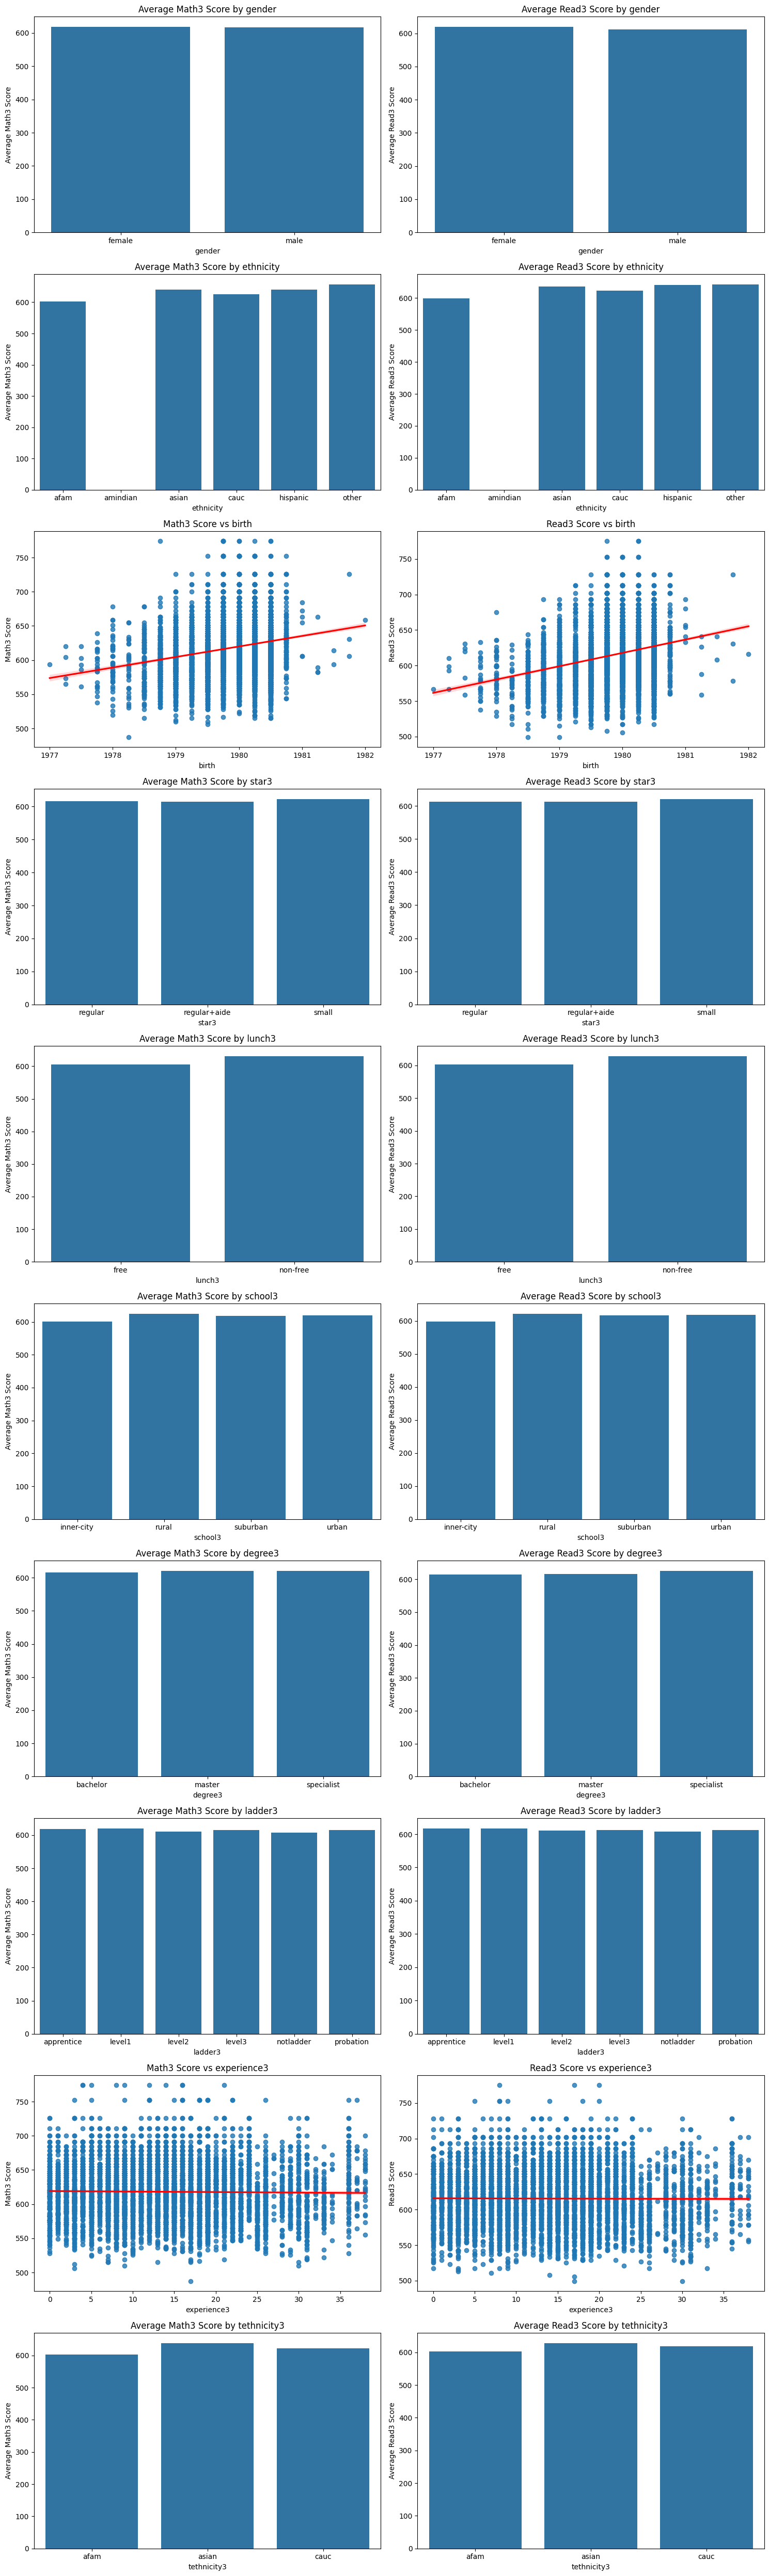

In [108]:
# グラフを描画するための設定
num_columns = len(df_3.columns) - 4
fig, axes = plt.subplots(num_columns, 2, figsize=(15, 5 * num_columns))

# 各カテゴリカル変数に対してmathkとreadkの平均値を計算し、可視化
i = 0
for column in df_3.columns:
    if column in ["math3", "read3"]:
        continue

    mean_values = df_3.groupby(column)[['math3', 'read3']].mean().reset_index()

    if column in ["gender", "ethnicity", "star3", "school3", "lunch3", "degree3", "ladder3", "tethnicity3"]:
        # mathkの平均値を棒グラフで表示
        sns.barplot(x=column, y='math3', data=mean_values, ax=axes[i, 0])
        axes[i, 0].set_title(f'Average Math3 Score by {column}')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Average Math3 Score')
        
        # readkの平均値を棒グラフで表示
        sns.barplot(x=column, y='read3', data=mean_values, ax=axes[i, 1])
        axes[i, 1].set_title(f'Average Read3 Score by {column}')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Average Read3 Score')
        i += 1
    
    if column in ["birth", "experience3"]:
        # mathkの平均値を散布図で表示
        # 近似曲線の色を変更
        sns.regplot(x=column, y='math3', data=df_3, ax=axes[i, 0], line_kws={"color": "red"})
        axes[i, 0].set_title(f'Math3 Score vs {column}')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Math3 Score')
        
        # readkの平均値を散布図で表示
        # 近似曲線の色を変更
        sns.regplot(x=column, y='read3', data=df_3, ax=axes[i, 1], line_kws={"color": "red"})
        axes[i, 1].set_title(f'Read3 Score vs {column}')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Read3 Score')
        i += 1

plt.tight_layout()
plt.show()

## ここからは課題とは関係ないが、因果推論チックなやり方

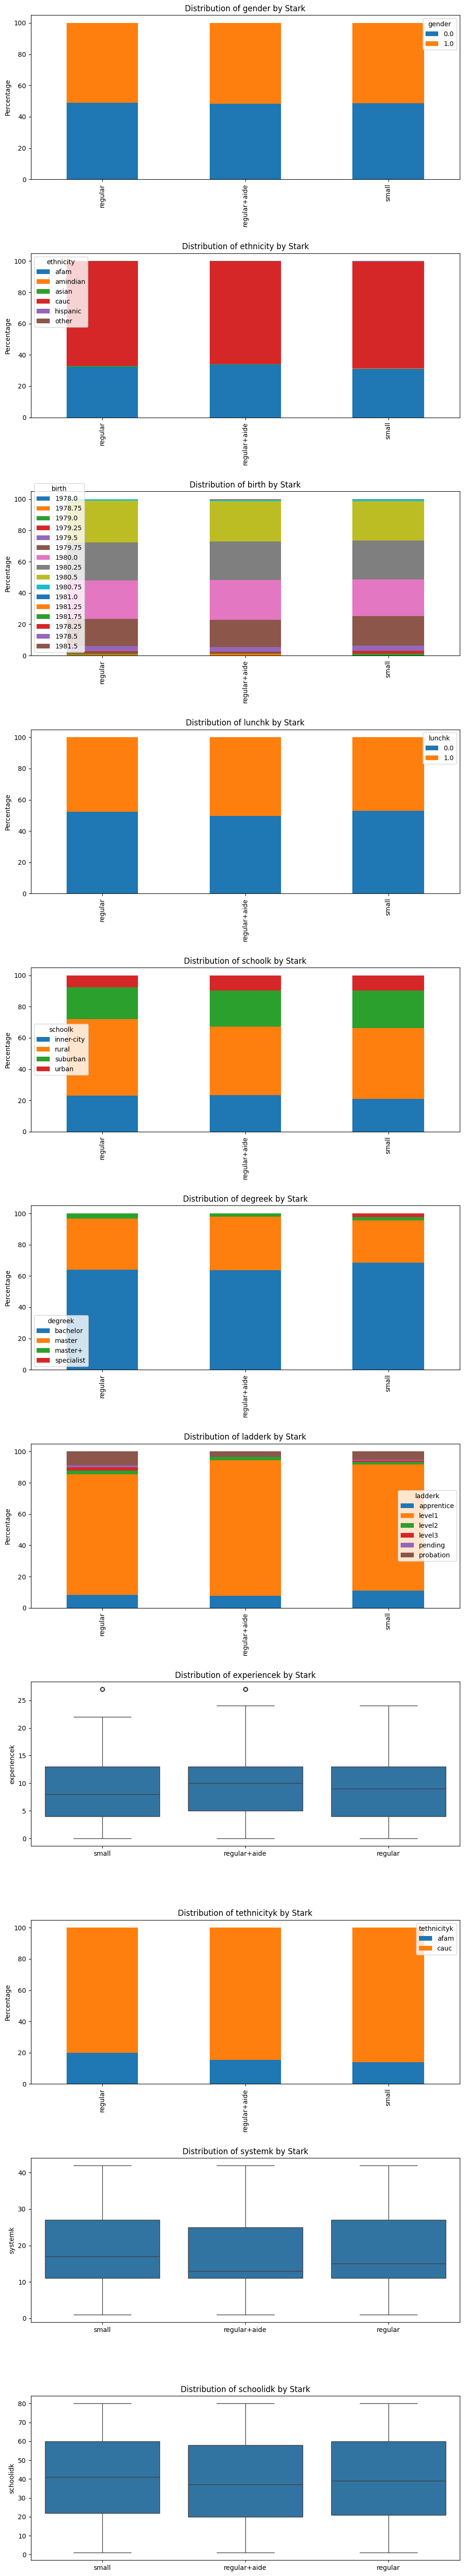

In [93]:
# グラフを描画するための設定
num_columns = len(df_k.columns) - 3
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 5 * num_columns))

# 各列に対して100%棒グラフを作成
i = 0
for column in df_k.columns:
    if column in ["experiencek", "systemk", "schoolidk"]:
        sns.boxplot(x='stark', y=column, data=df_k, ax=axes[i])
        axes[i].set_title(f'Distribution of {column} by Stark')
        axes[i].set_ylabel(column)
        axes[i].set_xlabel('')
        i += 1
    elif column not in ["stark", "readk", "mathk", "experiencek", "systemk", "schoolidk"]:
        distribution = df_k.groupby(['stark', column]).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
        distribution.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column} by Stark')
        axes[i].set_ylabel('Percentage')
        axes[i].set_xlabel('')
        axes[i].legend(title=column)
        i += 1
    else:
        continue

plt.tight_layout()
plt.show()

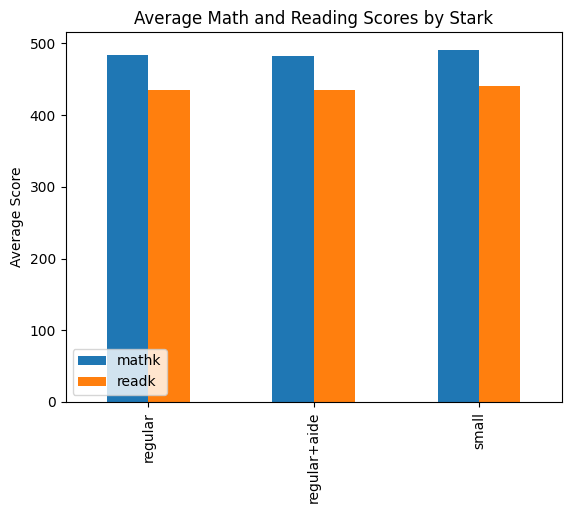

In [94]:
# starkの値で場合分けして、mathk, readkそれぞれの平均値を取得し、棒グラフで比較
df_k.groupby('stark')[['mathk', 'readk']].mean().plot(kind='bar')
plt.title('Average Math and Reading Scores by Stark')
plt.ylabel('Average Score')
plt.xlabel('')
# 凡例を左下に表示
plt.legend(loc='lower left')
plt.show()

In [95]:
# starkの値で場合分けして、mathk, readkそれぞれの平均値を取得し、表形式で出力
df_k.groupby('stark')[['mathk', 'readk']].mean()

,mathk,readk
stark,,
regular,483.199311,434.732303
regular+aide,482.795859,435.429550
small,490.931328,440.547441
